Random Forest 

Imagine you want to take a decision, but you don’t trust just one person’s opinion.

So what do you do?
You ask many people, then go with what most of them say.

 That’s Random Forest.

Think like this 

One Decision Tree = one person
(Smart, but sometimes biased or overconfident)

Random Forest = a group of people
(Each sees the problem a bit differently)

When many people agree, the decision is more reliable

Why “Random”?

Because:

Each person (tree) sees different data

Each person focuses on different features

So no one becomes overconfident or dominant.

Small real-life example 

You want to predict:

“Will I like this restaurant?”

You ask:

Friend 1 → checks taste

Friend 2 → checks price

Friend 3 → checks ambience

Each gives an opinion.
You follow the majority.

That’s Random Forest working behind the scenes.

What problem does it solve?

A single decision tree:

Can overthink

Can get fooled by small data changes

Random Forest:

Balances opinions

Avoids extreme decisions

Gives stable results

In simple words:

“Random Forest is a team of decision trees that vote together to give a better answer.”

When it’s used (very common!)

Fraud detection

Recommendation systems

Customer behavior prediction

Medical diagnosis

Credit risk analysis

How Random Forest Works (Step-by-Step)
Step 1: Bootstrap Sampling

From the original dataset, random samples are created with replacement

Each sample trains one decision tree

Step 2: Build Decision Trees

Each tree:

Sees different data

Uses random subset of features at each node

Trees grow independently

Step 3: Prediction

Classification → Majority voting

Regression → Average of all tree outputs

✔ Final result is more stable and accurate than a single tree

Key Features of Random Forest

Ensemble learning technique

Uses multiple decision trees

Reduces overfitting

Handles large datasets well

Works with non-linear data

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data      # features
y = data.target    # labels


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
rf_model = RandomForestClassifier(
    n_estimators=100,      # number of trees
    max_depth=None,        # grow full trees
    random_state=42
)


In [5]:
rf_model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [6]:
y_pred = rf_model.predict(X_test)


In [7]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



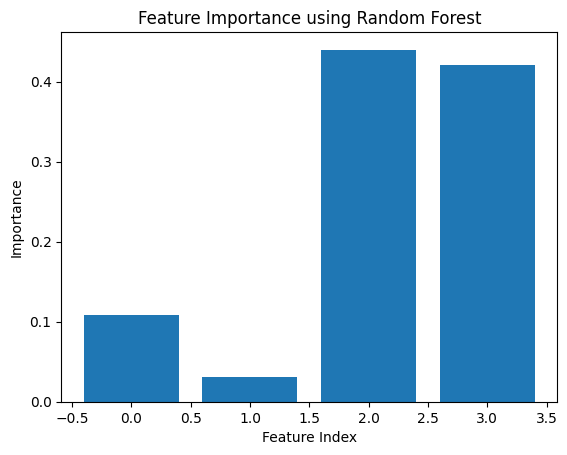

In [8]:
import matplotlib.pyplot as plt

feature_importance = rf_model.feature_importances_

plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importance using Random Forest")
plt.show()
